# Manufacturing Defects Prediction

---------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns;
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df= pd.read_csv('manufacturing_defect_dataset.csv')
df

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

# Checking Null Values

In [4]:
df.isnull().sum()
# No Null values

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

# Checking Duplicate Values

In [5]:
df.duplicated().sum()
# No Duplicated Values

np.int64(0)

# Integer Features

In [6]:
int_features = df.select_dtypes(include='int64').columns
int_features , len(int_features)

(Index(['ProductionVolume', 'DeliveryDelay', 'MaintenanceHours',
        'SafetyIncidents', 'DefectStatus'],
       dtype='object'),
 5)

# Float Features

In [7]:
float_features = df.select_dtypes(include = 'float64').columns
float_features , len(float_features)

(Index(['ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore',
        'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
        'WorkerProductivity', 'EnergyConsumption', 'EnergyEfficiency',
        'AdditiveProcessTime', 'AdditiveMaterialCost'],
       dtype='object'),
 12)

# Unique value of integer features

In [8]:
for cols in int_features:
    print(f"{cols} = {df[cols].unique()}")

ProductionVolume = [202 535 960 370 206 171 800 120 714 221 566 314 430 558 187 472 199 971
 763 230 761 408 869 443 591 513 905 485 291 376 260 559 413 121 352 847
 956 660 574 158 610 781 575 799 882 289 786 662 975 666 343 931 604 584
 918 746 940 266 373 487 700 415 113 341 876 445 664 997 439 191 466 554
 527 608 875 134 305 180 661 101 489 665 205 871 921 576 802 501 829 655
 261 301 369 962 915 555 561 826 351 801 395 824 819 848 437 978 152 891
 316 863 287 479 592 140 256 114 912 164 938 620 228 747 571 162 238 598
 692 491 774 518 388 478 872 589 330 127 234 300 939 879 132 147 602 506
 673 827 904 198 783 825 646 838 712 742 868 104 317 866 497 970 894 492
 306 957 653 991 560 790 674 963 842 340 663 195 999 833 754 270 640 135
 624 259 798 342 185 895 677 656 745 719 897 739 605 447 572 324 484 476
 382 732 727 844 358 458 809 510 748 417 776 333 926 473 771 707 332 791
 212 929 596 541 367 609 906 486 724 741 319 954 835 502 737 229 515 346
 935 538 302 283 222 500 393 379

# Unique Value for the float columns

In [9]:
for cols in float_features:
    print(f"{cols} = {df[cols].unique()}")

ProductionCost = [13175.40378345 19770.04609287 19060.82099746 ... 11736.17771202
 13664.19620956 13563.60580628]
SupplierQuality = [86.64853384 86.31066361 82.13247238 ... 96.43155384 91.08978229
 83.59595627]
DefectRate = [3.12149227 0.81953051 4.51450407 ... 4.8997558  4.05766458 2.70550164]
QualityScore = [63.46349433 83.69781763 90.35055003 ... 77.97344238 95.75559051
 94.63096489]
DowntimePercentage = [0.05234287 4.90832825 2.46492279 ... 4.87342929 0.0716626  4.80339419]
InventoryTurnover = [8.63051535 9.29659809 5.0974857  ... 3.84482435 2.78329781 5.83058044]
StockoutRate = [0.08132168 0.03848647 0.00288737 ... 0.00572421 0.04261218 0.05297845]
WorkerProductivity = [85.04237928 99.65744298 92.81926429 ... 81.59014324 88.48852523
 86.01004601]
EnergyConsumption = [2419.61678539 3915.56671252 3392.38536191 ... 2000.62164768 1534.79216921
 2610.52673644]
EnergyEfficiency = [0.46894662 0.11948456 0.49639153 ... 0.32552966 0.22273624 0.20609912]
AdditiveProcessTime = [5.55163899 9.

# 7-point summary

In [10]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


# Correlation

In [11]:
df.corr()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
ProductionVolume,1.000000,0.029584,-0.026559,0.016193,-0.019360,0.017826,-0.004554,0.019905,0.006947,-0.002637,0.004754,-0.024195,-0.010213,0.009923,-0.042393,-0.002980,0.128973
ProductionCost,0.029584,1.000000,-0.024103,0.017365,0.014428,-0.001603,0.007333,-0.004078,0.022749,0.006006,0.005030,-0.006958,-0.006728,-0.002778,0.011075,-0.002114,0.026720
SupplierQuality,-0.026559,-0.024103,1.000000,0.014233,0.012157,-0.029330,-0.019626,0.006298,0.018228,-0.001393,-0.017389,0.004552,-0.003582,-0.011614,-0.012507,-0.002430,0.038184
DeliveryDelay,0.016193,0.017365,0.014233,1.000000,-0.023024,0.017268,0.018144,0.046247,0.006685,-0.002767,-0.013869,0.006030,0.007233,0.029468,0.028085,-0.007601,0.005425
DefectRate,-0.019360,0.014428,0.012157,-0.023024,1.000000,-0.036350,-0.008687,-0.011208,-0.014148,0.007547,-0.000388,0.012196,0.005297,-0.014168,-0.028426,0.011596,0.245746
QualityScore,0.017826,-0.001603,-0.029330,0.017268,-0.036350,1.000000,-0.013366,-0.000505,-0.000618,-0.035049,0.004591,0.001293,-0.001694,-0.004147,0.009986,-0.021223,-0.199219
MaintenanceHours,-0.004554,0.007333,-0.019626,0.018144,-0.008687,-0.013366,1.000000,-0.020494,0.012758,0.019251,0.009622,0.009174,0.007017,-0.026486,-0.001820,-0.000845,0.297107
DowntimePercentage,0.019905,-0.004078,0.006298,0.046247,-0.011208,-0.000505,-0.020494,1.000000,0.010176,0.001578,-0.037814,0.003673,0.003447,0.012885,-0.008031,0.002355,0.004128
InventoryTurnover,0.006947,0.022749,0.018228,0.006685,-0.014148,-0.000618,0.012758,0.010176,1.000000,0.026002,0.001469,-0.017555,0.026336,0.025029,0.019967,0.000176,0.006733
StockoutRate,-0.002637,0.006006,-0.001393,-0.002767,0.007547,-0.035049,0.019251,0.001578,0.026002,1.000000,-0.035034,0.031724,-0.000690,0.025852,0.000870,-0.020563,0.040574


# Univariate analysis for the features
- KDE Plot

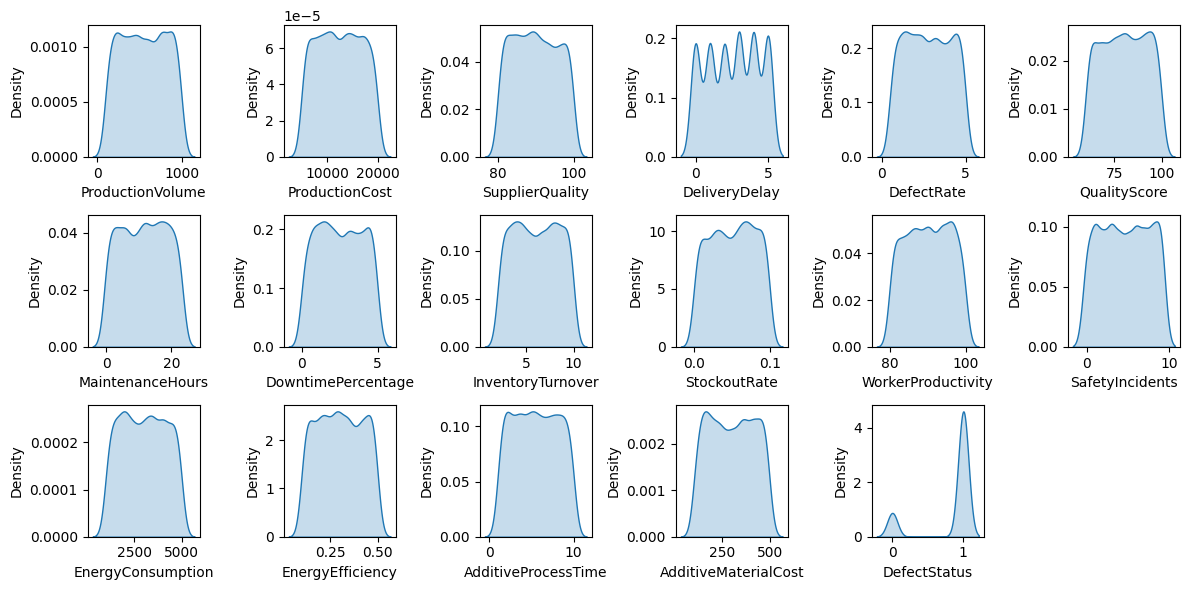

In [12]:
plt.figure(figsize=(12,6))

for i in range(len(df.columns)):
    plt.subplot(3,6,i+1)
    sns.kdeplot(df[df.columns[i]],shade = True)
    plt.xlabel(df.columns[i])
    
plt.tight_layout()
plt.show()

# All the data is normally distributed
# No tranformation needed

- Box Plot

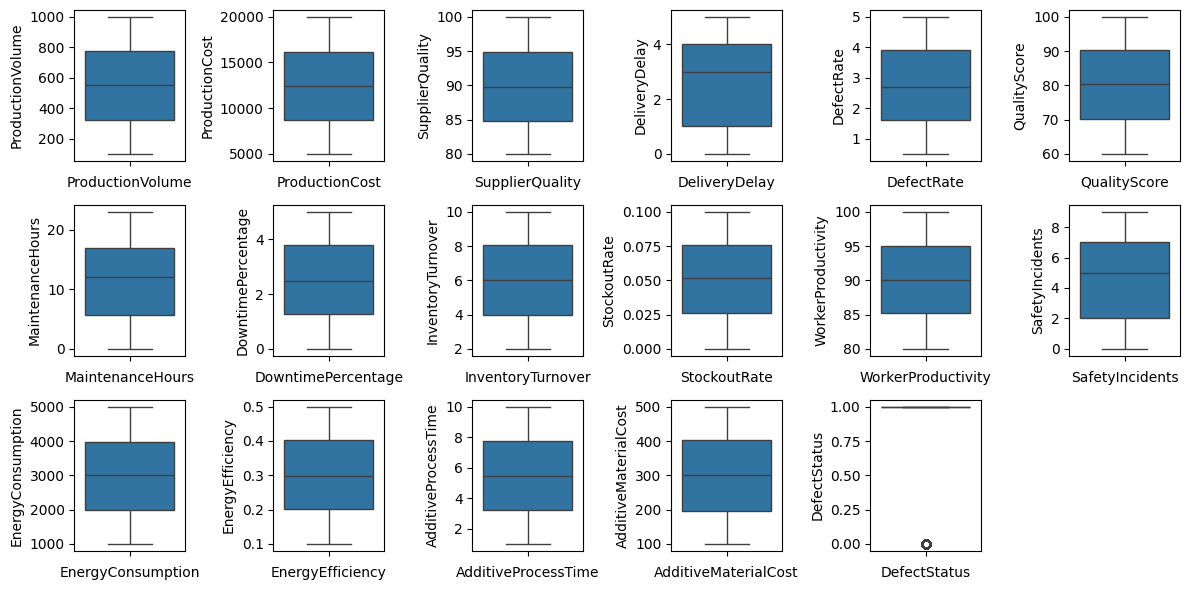

In [13]:
plt.figure(figsize=(12,6))

for i in range(len(df.columns)):
    plt.subplot(3,6,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    
plt.tight_layout()
plt.show()
# no outliers present all the features are properly in range

- Heatmap

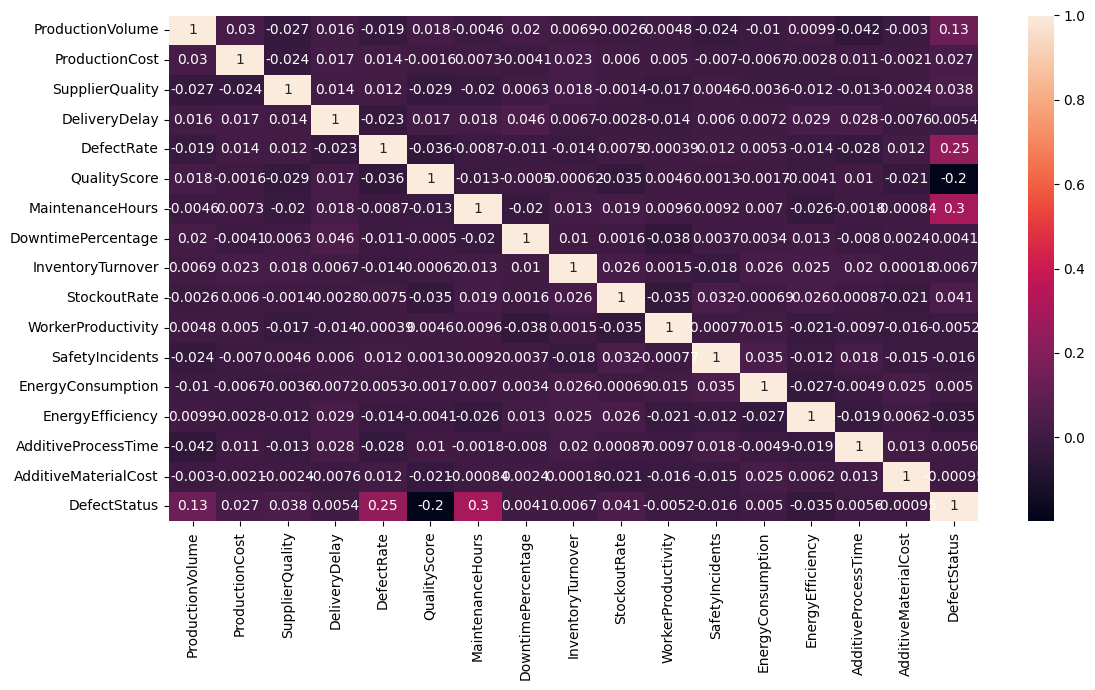

In [14]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr() , annot=True)
plt.tight_layout()
plt.show()

# Columns

In [15]:
df.columns

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality',
       'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost',
       'DefectStatus'],
      dtype='object')

# Feature Engineering

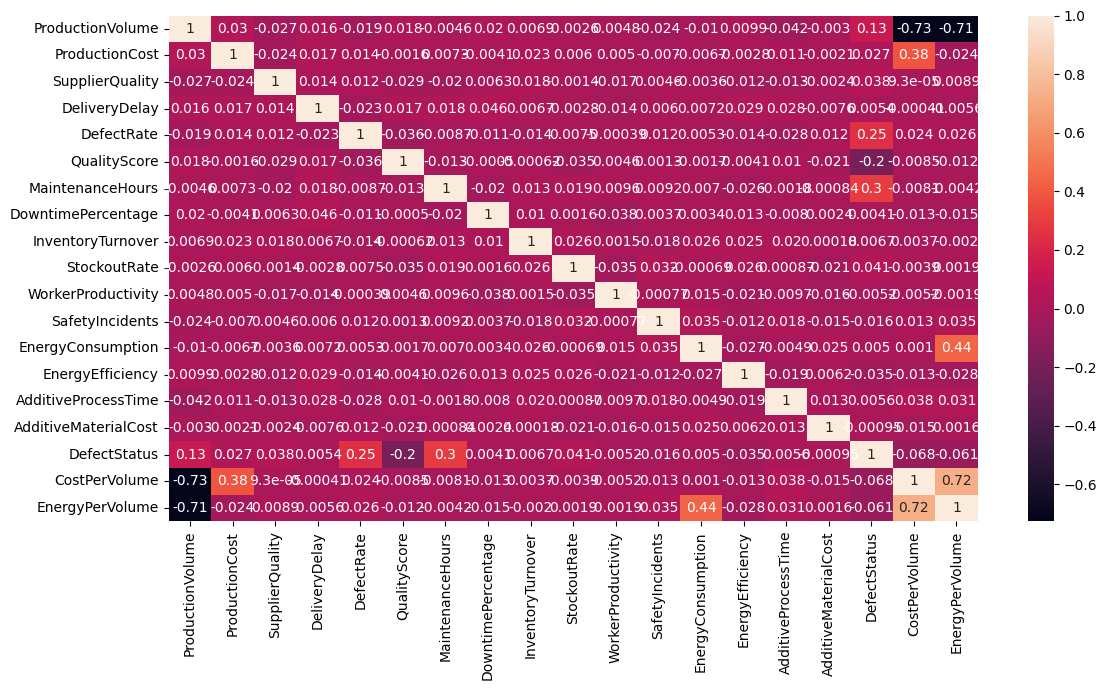

In [16]:
df['CostPerVolume'] = df['ProductionCost'] / df['ProductionVolume']
df['EnergyPerVolume'] = df['EnergyConsumption'] / df['ProductionVolume']

df.corr()

plt.figure(figsize = (12,7))
sns.heatmap(df.corr() , annot=True)
plt.tight_layout()
plt.show()


# Independent and Dependent Features

In [17]:
X = df.drop('DefectStatus',axis = 1 )
Y = df['DefectStatus']
X

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,CostPerVolume,EnergyPerVolume
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,65.224771,11.978301
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,36.953357,7.318816
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,19.855022,3.533735
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,15.263800,12.574055
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,36.272923,7.677817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,14.863109,4.315017
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,16.712949,8.242691
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,14.055303,2.395954
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,45.245683,5.082093


In [18]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
3235    0
3236    0
3237    1
3238    0
3239    0
Name: DefectStatus, Length: 3240, dtype: int64

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

# Training Data

In [20]:
print(X_train.shape)
X_train  


(2430, 18)


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,CostPerVolume,EnergyPerVolume
908,218,9120.557226,96.356441,0,4.178742,66.830182,17,3.943089,8.321264,0.003320,93.111680,6,1518.476079,0.202727,3.097651,463.718531,41.837418,6.965487
1688,918,7057.227322,86.070078,3,3.357611,67.766483,17,3.042691,5.199611,0.027532,96.123932,2,3958.638741,0.491376,7.508872,409.572428,7.687611,4.312243
1814,372,10696.272844,98.216685,0,3.468792,97.690447,2,1.985341,7.615749,0.080515,98.719468,1,4722.104003,0.100260,9.713078,244.669706,28.753422,12.693828
2845,447,17303.799784,98.638255,3,1.612153,81.035719,21,2.910172,4.634796,0.034926,88.421390,8,4255.942347,0.301616,5.298483,100.956036,38.710961,9.521124
2475,790,10748.230489,98.332862,2,0.577278,84.174459,2,0.307087,5.121599,0.057455,85.323096,3,3456.193763,0.302425,3.228886,129.849576,13.605355,4.374929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,115,7231.939541,82.827671,0,2.611770,92.580319,18,1.754191,9.612339,0.012817,81.882230,2,1802.100310,0.305271,4.817011,313.569379,62.886431,15.670437
1694,248,12317.514778,86.256893,5,0.838725,66.782320,0,1.625069,3.240275,0.022583,80.716674,4,3658.780264,0.250969,1.532592,442.690134,49.667398,14.753146
3079,535,17727.076616,81.379800,3,1.165796,87.145080,23,1.836547,5.892395,0.055419,86.189540,6,4647.144094,0.425673,9.552217,332.396043,33.134723,8.686251
1676,554,5938.472633,81.094900,1,1.087041,80.570860,7,1.408621,8.447098,0.046386,94.364337,9,1092.182416,0.192890,8.967372,187.084598,10.719265,1.971448


# Test Data

In [21]:
print(X_test.shape)
X_test 

(810, 18)


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,CostPerVolume,EnergyPerVolume
2451,655,19564.103744,92.611774,3,0.658223,88.666497,22,3.281241,7.470952,0.087899,81.253029,0,1471.203167,0.371855,9.051707,217.536758,29.868861,2.246112
2956,227,7988.295288,91.036575,0,3.275205,84.825478,4,1.175305,4.076865,0.041348,85.260760,7,2024.314958,0.216195,9.558863,130.011343,35.190728,8.917687
1497,426,16943.621758,90.669604,3,4.884091,78.640141,22,0.289728,2.315850,0.068219,80.202883,5,3742.284202,0.474966,1.907657,237.607460,39.773760,8.784705
1559,678,16434.539368,86.934375,3,1.800114,82.135698,11,0.423504,7.810600,0.043071,81.462375,2,4539.214145,0.493742,6.332155,252.225485,24.239734,6.695006
80,661,15615.214021,98.707890,5,3.419361,87.959404,7,3.804938,2.124990,0.057057,83.566565,3,2910.341566,0.109896,5.543747,454.136380,23.623622,4.402937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,248,14037.037557,96.945935,1,4.897154,63.152268,1,0.573469,8.975847,0.021715,96.926084,6,3491.157790,0.284191,1.463603,299.844548,56.600958,14.077249
1501,314,19086.027192,90.465725,1,3.043280,84.663514,1,3.827022,4.072880,0.021483,86.721764,6,1154.945955,0.152113,9.422545,271.475512,60.783526,3.678172
92,829,18996.699970,95.959961,3,1.105365,80.971439,19,4.352712,5.864219,0.086830,87.434710,3,2568.881668,0.385345,2.626709,303.605717,22.915199,3.098772
1222,534,15201.678282,83.866785,5,1.598286,86.710241,3,4.687203,5.111773,0.088528,80.635525,2,2869.769996,0.337432,9.205345,208.560810,28.467562,5.374101


# Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score , recall_score , f1_score , roc_auc_score

models = {
    'Random Forest':RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Model Fitting
    model.fit(X_train , Y_train)
    
    # Model's Prediction
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Perfromance on Training Data
    model_train_accuracy = accuracy_score(Y_train , Y_pred_train)
    model_train_f1 = f1_score(Y_train , Y_pred_train , average='weighted')
    model_train_precision = precision_score(Y_train,Y_pred_train)
    model_train_recall = recall_score(Y_train , Y_pred_train)
    model_train_roc_auc_score = roc_auc_score(Y_train , Y_pred_train)
    
    # Performane on Test Data
    model_test_accuracy = accuracy_score(Y_test, Y_pred_test)
    model_test_f1 = f1_score(Y_test , Y_pred_test , average='weighted')
    model_test_precision = precision_score(Y_test,Y_pred_test)
    model_test_recall = recall_score(Y_test , Y_pred_test)
    model_test_roc_auc_score = roc_auc_score(Y_test , Y_pred_test)
    
    print("****",list(models.keys())[i],"****")
    
    print("Model Performance for training set")
    print("Accuracy: {:.4f}" . format(model_train_accuracy))
    print("F1-Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score)) 
    
    print("-"*35)
    
    print("Model Performance for Test set") 
    print("Accuracy: {:.4f}" . format(model_test_accuracy))
    print("F1-Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))   
    
    print("="*35)
    print("\n")


**** Random Forest ****
Model Performance for training set
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc Auc Score: 1.0000
-----------------------------------
Model Performance for Test set
Accuracy: 0.9519
F1-Score: 0.9493
Precision: 0.9521
Recall: 0.9927
Roc Auc Score: 0.8645




# Confusion Matrix plot for the Random Forest Model

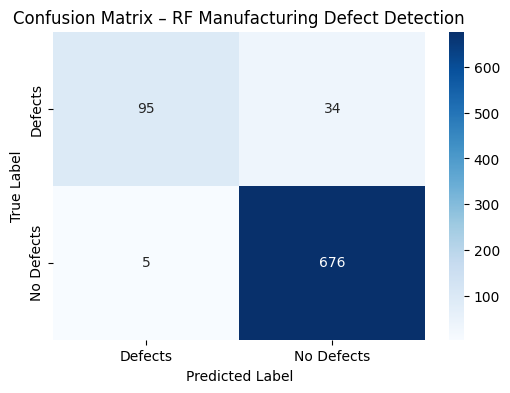

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test , Y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Defects', 'No Defects'],
            yticklabels=['Defects', 'No Defects'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – RF Manufacturing Defect Detection')
plt.show()

# HyperParameter Tuning

In [24]:
rf_params = {
    'n_estimators' : [100,200,500,1000],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [5,8,10,15,None],
    'max_features' : [5,7,8,'auto'],
    'min_samples_split' : [2,8,15,20]
}

model_params = {}

tuning_models = [('Random forest' , RandomForestClassifier() , rf_params)]
from sklearn.model_selection import RandomizedSearchCV

for name,model,params in tuning_models:
    rand = RandomizedSearchCV(estimator=model , param_distributions=params , cv = 3 , n_jobs= -1 , n_iter=100)
    
    rand.fit(X_train , Y_train)
    model_params[name] = rand.best_params_
    
for model_name in model_params:
    print(f"----------------------- Best Params for {model_name} ---------------------------")
    print(model_params[model_name])

----------------------- Best Params for Random forest ---------------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10, 'criterion': 'log_loss'}


# Retraining the Model

In [26]:
tunned_model = RandomForestClassifier(n_estimators= 200, min_samples_split=2, max_features= 5, max_depth= 10, criterion= 'log_loss')

tunned_model.fit(X_train , Y_train)

Y_pred_tune_train = tunned_model.predict(X_train)
Y_pred_tune_test = tunned_model.predict(X_test)


# Perfromance on Training Data
model_train_accuracy = accuracy_score(Y_train , Y_pred_tune_train)
model_train_f1 = f1_score(Y_train , Y_pred_tune_train , average='weighted')
model_train_precision = precision_score(Y_train,Y_pred_tune_train)
model_train_recall = recall_score(Y_train , Y_pred_tune_train)
model_train_roc_auc_score = roc_auc_score(Y_train , Y_pred_tune_train)
    
# Performane on Test Data
model_test_accuracy = accuracy_score(Y_test, Y_pred_tune_test)
model_test_f1 = f1_score(Y_test , Y_pred_tune_test , average='weighted')
model_test_precision = precision_score(Y_test,Y_pred_tune_test)
model_test_recall = recall_score(Y_test , Y_pred_tune_test)
model_test_roc_auc_score = roc_auc_score(Y_test , Y_pred_tune_test)
    
print("****",list(models.keys())[i],"****")
    
print("Model Performance for training set")
print("Accuracy: {:.4f}" . format(model_train_accuracy))
print("F1-Score: {:.4f}".format(model_train_f1))
print("Precision: {:.4f}".format(model_train_precision))
print("Recall: {:.4f}".format(model_train_recall))
print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score)) 
    
print("-"*35)
    
print("Model Performance for Test set") 
print("Accuracy: {:.4f}" . format(model_test_accuracy))
print("F1-Score: {:.4f}".format(model_test_f1))
print("Precision: {:.4f}".format(model_test_precision))
print("Recall: {:.4f}".format(model_test_recall))
print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))   
    
print("="*35)
print("\n")


**** Random Forest ****
Model Performance for training set
Accuracy: 0.9835
F1-Score: 0.9833
Precision: 0.9831
Recall: 0.9976
Roc Auc Score: 0.9537
-----------------------------------
Model Performance for Test set
Accuracy: 0.9519
F1-Score: 0.9493
Precision: 0.9521
Recall: 0.9927
Roc Auc Score: 0.8645




In [29]:
import pickle
pickle.dump(tunned_model , open("Manufacturing_defect_model.pkl","wb"))

# Observation
- We used the Random Forest Machine Algorithm for the Prediction of Manufacturing Defects from the dataset and Got the accuracy 0f 96%